# Hierarchical Bayesian Deconvolution demo

In [21]:
import response_fytter

from response_fytter.simulate import simulate_fmri_experiment
import pandas as pd
import numpy as np
from response_fytter import hierarchical_bayes

## Simulate dataset with 15 subjects, 2 conditions,  between 1 and 5 trials and quite som variability (to see some shrinkage)

In [22]:
TR = 1.5

data, onsets, parameters = simulate_fmri_experiment([{'name':'Condition A', 'mu_group':2, 'std_group':3},
                                                     {'name':'Condition B', 'mu_group':4, 'std_group':3}], 
                                                    n_subjects=15, run_duration=60, n_trials=[1, 5], TR=TR)

## Set up set of first-level model

In [23]:
hfit = hierarchical_bayes.HierarchicalBayesianModel()

df = []

for (subj_idx, run), d in data.reset_index().groupby(['subj_idx', 'run']):
    print(subj_idx)
    
    fytter = response_fytter.ResponseFytter(d.signal.values, 1./TR)

    
    fytter.add_event('Condition A',
                     onset_times=onsets.loc[subj_idx, run, 'Condition A'].onset,
                     interval=[0, 20])
    
    fytter.add_event('Condition B',            
                     onset_times=onsets.loc[subj_idx, run, 'Condition B'].onset,
                     interval=[0, 20])    
    
    hfit.add_run(fytter, subj_idx)

1
2
3
4
5
6
7
8
9
10
11


/Users/gilles/git/response_fytter/response_fytter/regressors.py:160: UserWarning: 
Interval is now automatically set to [ 0.  19.5].
  warnings.warn(warning)


12
13
14
15


## Sample three chains, 1000 iterations each (first 500 are warmup)

In [24]:
hfit.build_model()
hfit.sample(chains=3, iter=1000)

/Users/gilles/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


(this took 40 seconds)

## Now plot 95 credible intervals on group parameters

/Users/gilles/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


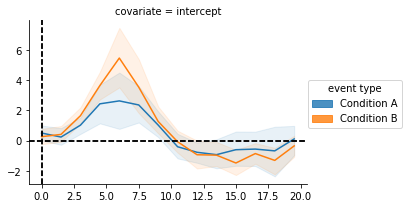

In [28]:
hfit.plot_group_timecourses(covariates='intercept')

## And 95 credible intervals for individual subjects

/Users/gilles/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


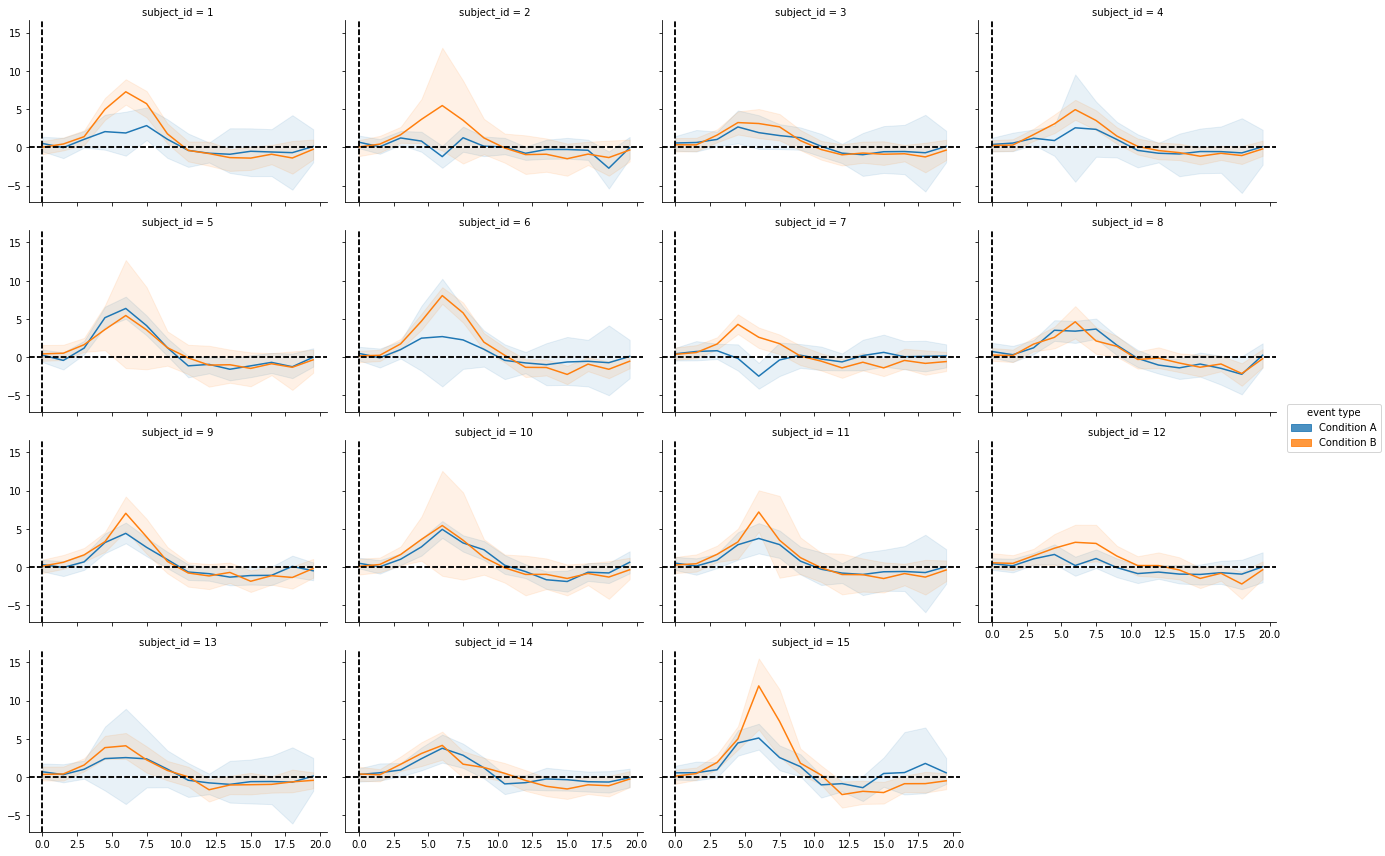

In [29]:
hfit.plot_subject_timecourses(covariates='intercept')

If we look at the number of trials per subject, we notice that subjects/conditions that have little trials are "shrinked" to the group mean

In [30]:
onsets.groupby(['subj_idx', 'condition']).size()

subj_idx  condition  
1         Condition A    2
          Condition B    4
2         Condition A    3
          Condition B    3
3         Condition A    1
          Condition B    2
4         Condition A    1
          Condition B    4
5         Condition A    2
          Condition B    1
6         Condition A    1
          Condition B    4
7         Condition A    3
          Condition B    3
8         Condition A    2
          Condition B    4
9         Condition A    4
          Condition B    4
10        Condition A    4
          Condition B    1
11        Condition A    1
          Condition B    1
12        Condition A    4
          Condition B    2
13        Condition A    1
          Condition B    2
14        Condition A    3
          Condition B    3
15        Condition A    3
          Condition B    2
dtype: int64

And the parameters:

In [31]:
parameters

amplitude
subj_idx condition             
1        Condition A   3.353985
         Condition B   7.647069
2        Condition A  -1.687925
         Condition B   3.845720
3        Condition A   1.616022
         Condition B   3.794439
4        Condition A   1.509138
         Condition B   4.566375
5        Condition A   7.291357
         Condition B   1.941936
6        Condition A   1.723695
         Condition B   8.063084
7        Condition A  -3.114441
         Condition B   3.336679
8        Condition A   4.571447
         Condition B   3.512188
9        Condition A   3.995865
         Condition B   5.588242
10       Condition A   4.693272
         Condition B   0.601055
11       Condition A   3.452056
         Condition B   4.896769
12       Condition A   0.545570
         Condition B   2.530580
13       Condition A  -4.270128
         Condition B   3.334837
14       Condition A   5.415789
         Condition B   2.584449
15       Condition A   6.318142
         Condition B  11.252880